# <center> Python for Data Science - Final Project:
## <center> A Data Science Approach to Predict Forest Fires
<center>
By:
- Johannes RUSCHER
- Javier FERNANDEZ
</center>

## Getting Started

The first step in doing any data analysis is to import the required libraries that will help us read, visualize, and analyze the data through python functions.

In [116]:
# General data and stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# +Config to plot inline: %matplotlib inline 

# Modeling
## Unsupervised
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

## Supervised
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neural_network import MLPRegressor, MLPClassifier

## Data overview

We can now open the CSV data file and take a look at our initial dataset.

In [177]:
forest_fires_data_filepath = 'data/forestfires.csv'
df = pd.read_csv(forest_fires_data_filepath) # data_forest dataframe
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


Let us now use some basic data inspection functions on the dataset.

In [178]:
# Get general information about the forest fires data
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [179]:
# Get general information about the dataset itself
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


### Quality of data

We can see that the data consists of 13 columns in total, from which 12 are input variables or features and one is the output variable. The dataset contains 517 rows of information, and from the `.info()` method we can already see that all the 13 columns already contain 517 non-null values, so we can conclude that there are __no missing values__ to handle. 

We can also see that there are only 2 categorical features, month and day (time data). Although it is clear for a human to properly interpret these, we might have to encode them later for a computer algorithm to also interpret them properly.

### Understanding the data

As specified in the data description and study document, the data consists of:

2 spatial features, 

> - **X** - x-axis spatial coordinate within the Montesinho park map: 1 to 9
> - **Y** - y-axis spatial coordinate within the Montesinho park map: 2 to 9

2 temporal features, 

> - **month** - month of the year: "jan" to "dec" 
> - **day** - day of the week: "mon" to "sun"

4 FWI __*__ components, 

> - **FFMC** - FFMC index from the FWI system: 18.7 to 96.20
> - **DMC** - DMC index from the FWI system: 1.1 to 291.3 
> - **DC** - DC index from the FWI system: 7.9 to 860.6 
> - **ISI** - ISI index from the FWI system: 0.0 to 56.10

4 weather related features, 

> - **temp** - temperature in Celsius degrees: 2.2 to 33.30
> - **RH** - relative humidity in %: 15.0 to 100
> - **wind** - wind speed in km/h: 0.40 to 9.40 
> - **rain** - outside rain in mm/m2 : 0.0 to 6.4 

and the area burned value, which corresponds to the **output** variable.

> - **area** - the burned area of the forest (in ha): 0.00 to 1090.84 
(this output variable is very skewed towards 0.0, thus it may make

__*__ The forest **[Fire Weather Index (FWI) System](https://www.nwcg.gov/publications/pms437/cffdrs/fire-weather-index-system)** is a way to calculate a unit-less number that will describe the intensity of a fire based solely on weather condition readings. 

> There are 3 *fuel moisture* categories or codes, which can be converted to moisture content:
> 
> - **Fine Fuel Moisture Code (FFMC)** represents moisture conditions for shaded litter fuels. Subtracting the FFMC value from 100 can provide an estimate for the equivalent fuel moisture content (ranges from 0 to 101).
> - **Duff Moisture Code (DMC)** represents fuel moisture of decomposed organic material underneath the litter. It may provide insidght to live fuel moisture stess (open ended).
> - **Drought Code (DC)** represents drying deep into the soil. Extreme drought conditions have produced DC values near 800 (ranges from 0 to 1000).
> 
> Fuel moisture codes rise as fuels dry out, and falls with precipitation and (primarily with FFMC) with moderating weather.
> 
> There are 3 *fire behavior indices* in the FWI System:
> 
> - The **Initial Spread Index (ISI)** integrates fuel moisture for fine dead fuels and surface windspeed to estimate a spread potential (open ended).
> - The **Buildmap Index (BUI)** combines the current DMC and DC to produce an estimate of potential heat release in heavier fuels (open ended).
> - The **Fire Weather Index (FWI)** integrates current ISI and BUI to produce a unitless and open ended index of general fire intensity potential. With dry fuel conditions, it is a key indicator of extreme fire behavior potential.
> 
> ![FWI Chart](res/fwi-chart.png "fwi-chart")

### Limitations of the data

The temporal data consists only of the month and the day on which the fire was recorded but it does not contain the exact date. Since the data was recorded over the span of three years it would be interesting to see if the occurence fluctuated between years. Secondly, we don't know how long a fire lasted. Finally, looking at accumulated parameters, especially rain, and the impact on occurences of fire would be very interesting.

## *A.* Statistical analysis and feature engineering

Our objective here will be to understand how the variables interact with each other in order to know or to have a better idea of how to build a proper model that will actually be meaningful and provide useful information. We will aproach by using unidimensional and multidimensional statistical methods, as well as preparing some new variables which might be useful for the supervised and unsupervised learning models.

First let us take a look at the **area** feature, our output variable.

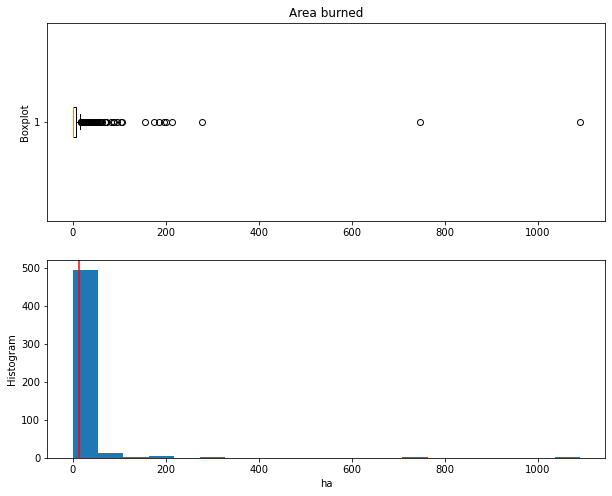

In [180]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.title('Area burned')

plt.ylabel('Boxplot')
plt.boxplot(df['area'], vert=False)

plt.subplot(2, 1, 2)
plt.ylabel('Histogram')
plt.hist(df['area'], bins=20)
plt.axvline( df['area'].mean(), color='red' ) # add the mean value
plt.xlabel('ha')

plt.show()

We can confirm that the data is extremely skewed towards 0, so let us use instead its logarithmic transform using *y=ln(x+1)* to fix it. We can conclude however that the vast majority of the fires, at least recorded in this dataset, are *relatively* small (<100ha), because even from the information given previously by the `.describe()` method shows that 75% of the fires are <= 6.57 ha, which is (barely) visible in the boxplot.

In [181]:
import math
df['area_ln'] = df['area'].map(lambda x: math.log(x+1))

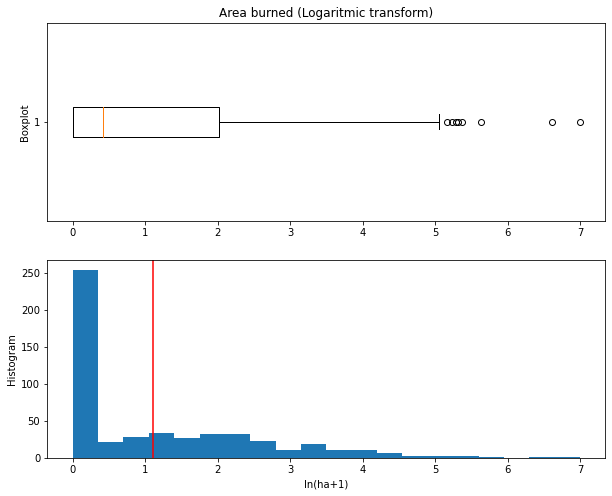

In [182]:
# And plot again
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.title('Area burned (Logaritmic transform)')

plt.ylabel('Boxplot')
plt.boxplot(df['area_ln'], vert=False)

plt.subplot(2, 1, 2)
plt.ylabel('Histogram')
plt.hist(df['area_ln'], bins=20)
plt.axvline( df['area_ln'].mean(), color='red' ) # add the mean value
plt.xlabel('ln(ha+1)')

plt.show()

We can now more easily divide them into categories as well, which will simplify the analysis and transform it into a **classification** problem. We decided to use 3 categories to simplify the problem enough while maintaining relevant and meaningful accurate results:

- `0 : small` : fires with log. area equal to zero.
- `2 : medium` : fires with log. area between zero and 2 (75th percentile)
- `1 : large` : fires with log. area larger than 2 (last quartile)

In [183]:
# Divide Fires into categories (s, m, l)
df["fire_size"] = df["area_ln"].apply(
    lambda a: 1 if (a>0 and a<=2) else (2 if a>2 else 0)
    ).astype('category')

def seeFireSize(n=0):
    print(df[['area_ln', 'fire_size']][df['fire_size'] == n].tail())

seeFireSize(0)
seeFireSize(1)
seeFireSize(2)


     area_ln fire_size
507      0.0         0
508      0.0         0
511      0.0         0
515      0.0         0
516      0.0         0
      area_ln fire_size
496  1.327075         1
503  1.081805         1
505  1.916923         1
509  1.153732         1
510  0.357674         1
      area_ln fire_size
499  2.469793         2
504  3.923754         2
512  2.006871         2
513  4.012592         2
514  2.498152         2


In any case, we could take into consideration for now only the amount of fires that occurred, since we know that most of the fires are rather small. 

We can now take a look at the other features. Let us start with the temporal variables for example, `month` and `day`. We could see if there is a remarkable relation between these variables and the amount of fires.

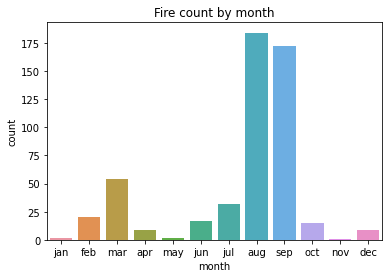

In [184]:
def count_monthly_occurrence():
    sns.countplot(x="month", data=df, 
    order=["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]
    ).set(title='Fire count by month')
count_monthly_occurrence()

We can clearly see that most of the fires happen in august and september and that there is a local maximum in march.

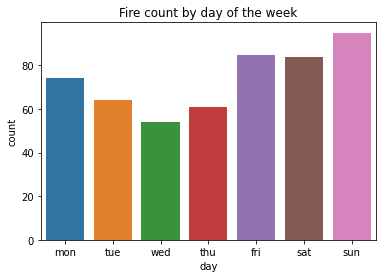

In [185]:
def count_daily_occurrence():
    sns.countplot(x="day", data=df, 
    order = ["mon","tue","wed","thu","fri","sat","sun"]
    ).set(title='Fire count by day of the week')
count_daily_occurrence()

In this case, in order to properly visualize the data in a more meaningful and understandable way, we had to manually order each value. This is because they are ordinal/categorical data, but we can **encode** them so that from now on we don't have to manually order them. This will also help the computer algorithms interpret the data properly.

In [186]:
# We can encode them in order (starting with 1) and cast as categorical data

month_order = ["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]
df["month_n"] = df["month"].apply(lambda m: month_order.index(m) +1)#.astype('category')

day_order = ["mon","tue","wed","thu","fri","sat","sun"]
df["day_n"] = df["day"].apply(lambda d: day_order.index(d) +1)#.astype('category')

# See result
df[['month', 'month_n', 'day', 'day_n']].head() 

,month,month_n,day,day_n
0,mar,3,fri,5
1,oct,10,tue,2
2,oct,10,sat,6
3,mar,3,fri,5
4,mar,3,sun,7


We could also try to see if the geographical location (X and Y features) plays an important role on the amount of fires.

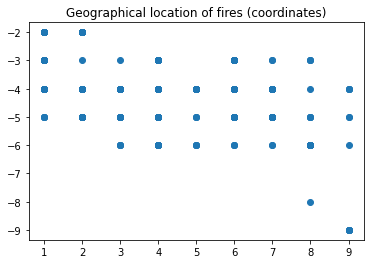

In [187]:
plt.title('Geographical location of fires (coordinates)')
plt.scatter(df['X'], -df['Y']);

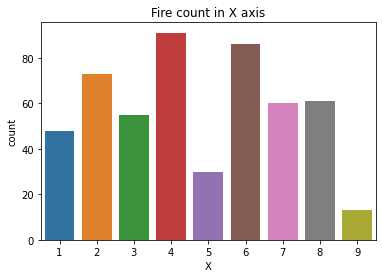

In [188]:
sns.countplot(x="X", data=df,
    ).set(title='Fire count in X axis');

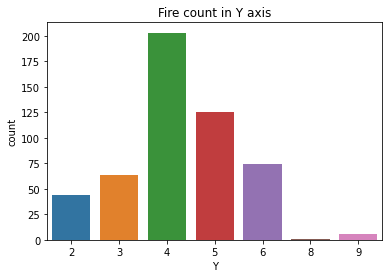

In [189]:
sns.countplot(x="Y", data=df, orient='h'
    ).set(title='Fire count in Y axis');

So we can see that the majority of the fires are in the mid-northern part of the map, with not much fires going on in the south. Fires seem to be common from east to west.
> **Less area in the south! Meaningful to say less fires in south?**

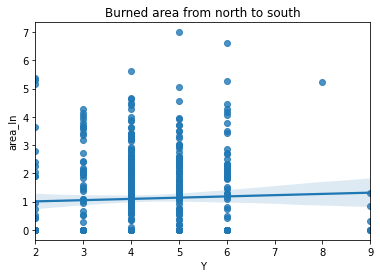

In [190]:
sns.regplot(x='Y', y='area_ln', data=df).set_title("Burned area from north to south");

However there still does not seem to be enough correlation between these variables alone.

We will now try to explore the data from the FWI components, as well as the weather features.

In [191]:
df_fwi = df[['FFMC', 'DMC', 'DC', 'ISI', 'area_ln']]
df_wthr = df[['temp', 'RH', 'wind', 'rain', 'area_ln']]

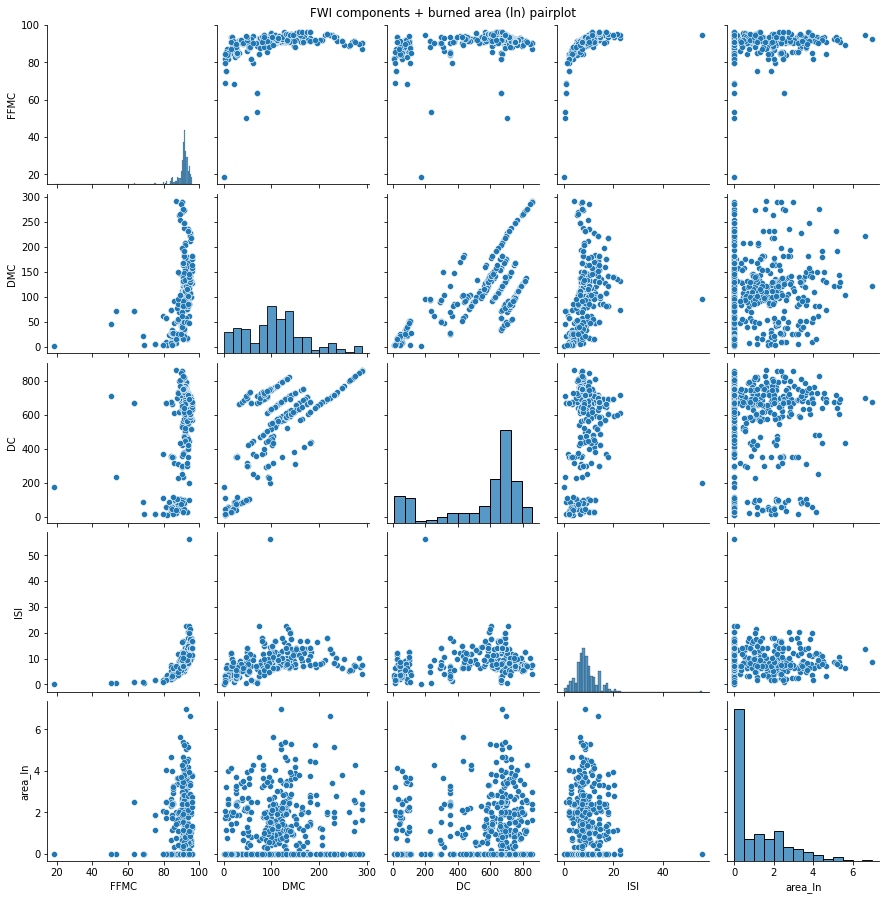

In [192]:
pl = sns.pairplot(df_fwi)
pl.fig.suptitle("FWI components + burned area (ln) pairplot", y=1);

From the pairpot we can quickly visualize some strong correlations and some not so strong ones. For example, DC and DMC are strongly correlated, which makes sense because they both derive from the rain and humidity weather conditions. We can also see that practically all of the fires happen with high values of the 4 FWI components. It would be interesting to be able to calculate the FWI and compare only this index with the probability of a fire and how big it would be.

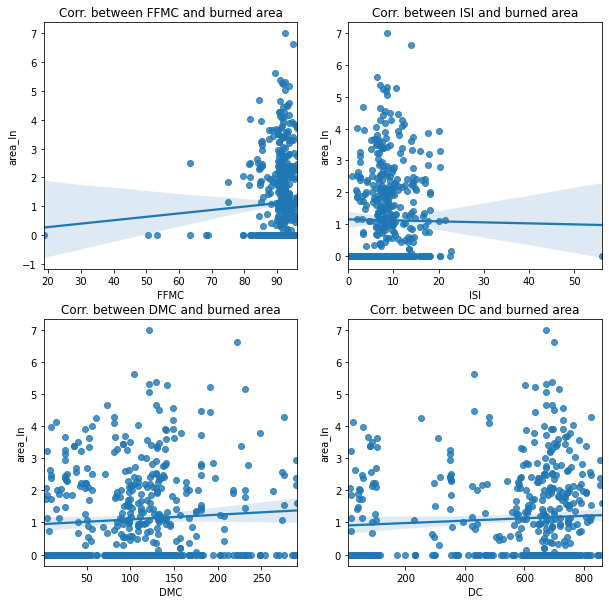

In [193]:
fig, pos = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
sns.regplot(x='FFMC', y='area_ln', data=df_fwi, ax=pos[0,0]
    ).set_title("Corr. between FFMC and burned area");
sns.regplot(x='ISI', y='area_ln', data=df_fwi, ax=pos[0,1]
    ).set_title("Corr. between ISI and burned area");
sns.regplot(x='DMC', y='area_ln', data=df_fwi, ax=pos[1,0]
    ).set_title("Corr. between DMC and burned area");
sns.regplot(x='DC', y='area_ln', data=df_fwi, ax=pos[1,1]
    ).set_title("Corr. between DC and burned area");

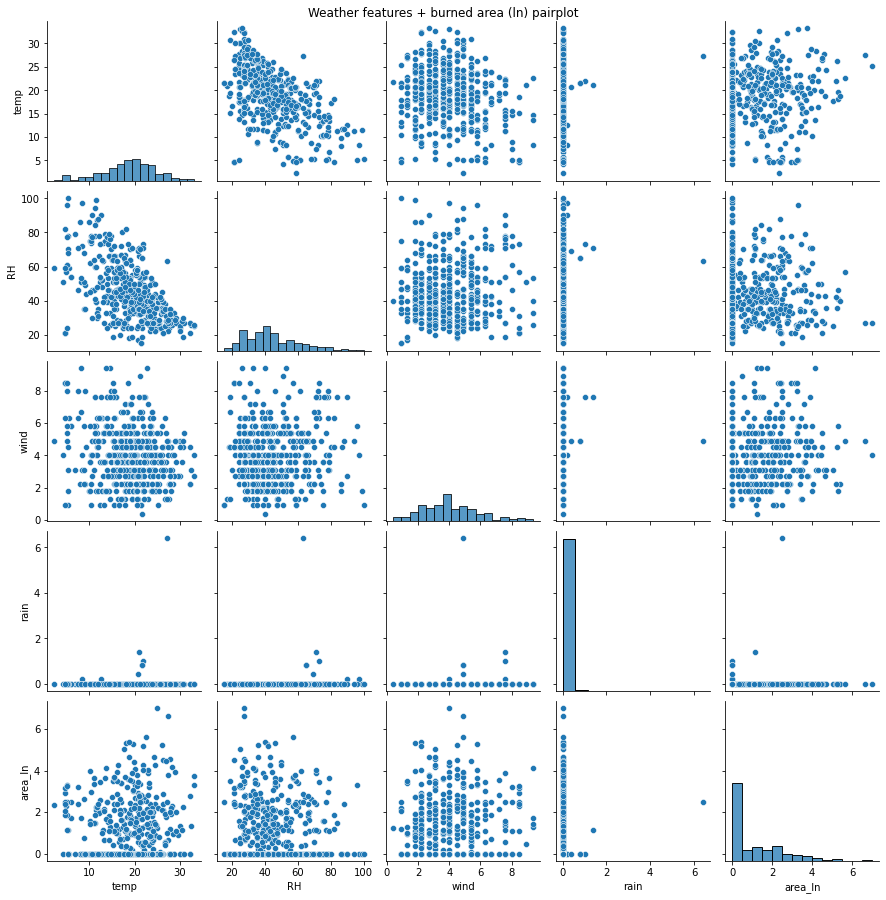

In [194]:
pl = sns.pairplot(df_wthr)
pl.fig.suptitle("Weather features + burned area (ln) pairplot", y=1);

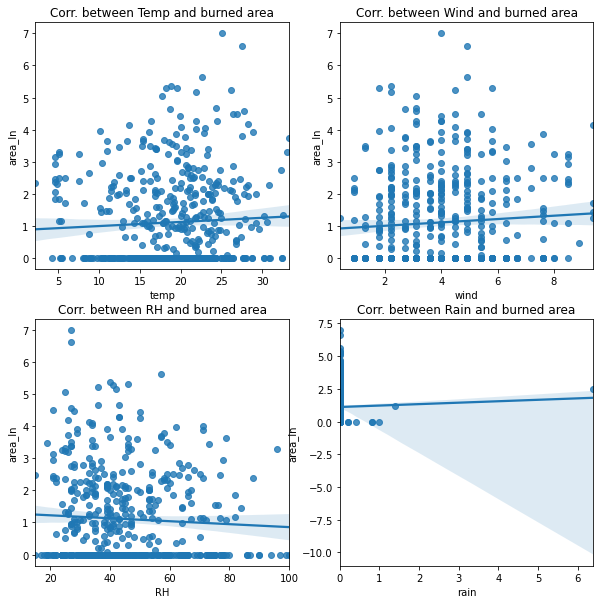

In [195]:
fig, pos = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
sns.regplot(x='temp', y='area_ln', data=df_wthr, ax=pos[0,0]
    ).set_title("Corr. between Temp and burned area");
sns.regplot(x='wind', y='area_ln', data=df_wthr, ax=pos[0,1]
    ).set_title("Corr. between Wind and burned area");
sns.regplot(x='RH', y='area_ln', data=df_wthr, ax=pos[1,0]
    ).set_title("Corr. between RH and burned area");
sns.regplot(x='rain', y='area_ln', data=df_wthr, ax=pos[1,1]
    ).set_title("Corr. between Rain and burned area");

Finally we can also take a look at the heatmap of the correlation between all of these variables.

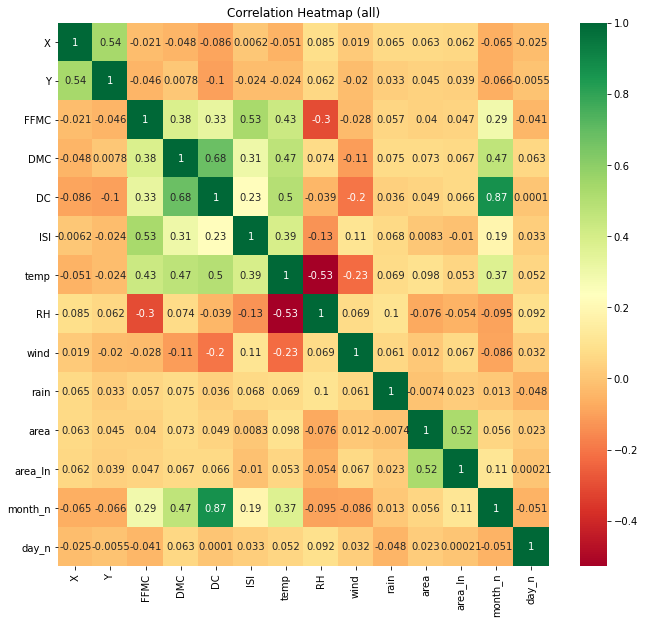

In [196]:
plt.figure(figsize=(11,10))
plt.title('Correlation Heatmap (all)')
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn');

We can see that the biggest correlations with the output variable *burned area* are still under 0.1, but are mainly temp, DMC, and DC. However, the month of the year does play a big role on the FWI components, which as we saw previously, impact the fire count. We could easily say that in fact there is a *fire season*.

## *B.* Unsupervised Learning: Clustering

Now we will attempt to run an unsupervised learning algorithm on the data. We will use the K-Means clustering algorithm.

Since our dataset is composed of various features, we will split it into different datasets that will group these features by type. This will hopefully simplify the computing of the algorithm and possible give a more meaningful result.

In [73]:
df_spatial = df[['X', 'Y', 'fire_size']]
df_temporal = df[['month_n', 'day_n', 'fire_size']]
df_spatial_temporal = df[['X', 'Y', 'month_n', 'day_n', 'fire_size']]
df_fwi_components = df[['FFMC', 'DMC', 'DC', 'ISI', 'fire_size']]
df_weather = df[['temp', 'RH', 'wind', 'rain', 'fire_size']]

Since the number of clusters is not obvious, we will use a quality index that will evaluate the quality of the clustering, then select the cluster quantity that yields the highest quality index. Let us build a function for that.

In [74]:
def getClusterQty(dataframe, max=11, i=10):
    range_n_clusters = range(2,max)
    best = (0, 0) # = (n_clusters, score)
    for n in range_n_clusters:
        clusterer = KMeans(n_clusters=n, n_init=i).fit(dataframe) 
        score = silhouette_score(dataframe, clusterer.labels_) 

        best = (n, score) if score > best[1] else best
    
    print(" - Best nr. of clusters is", best[0],
    "| score =", round(best[1], 5))
    return best

In [75]:
print("> Spatial:")
best_spatial = getClusterQty(df_spatial)

print('> Temporal:')
best_temporal = getClusterQty(df_temporal)

print('> Spatial-Temporal:')
best_spatial_temporal = getClusterQty(df_spatial_temporal)

print('> FWI Components:')
best_fwi_components = getClusterQty(df_fwi_components)

print('> Weather:')
best_weather = getClusterQty(df_weather)

> Spatial:
 - Best nr. of clusters is 2 | score = 0.47468
> Temporal:
 - Best nr. of clusters is 2 | score = 0.51198
> Spatial-Temporal:
 - Best nr. of clusters is 3 | score = 0.32227
> FWI Components:
 - Best nr. of clusters is 2 | score = 0.74843
> Weather:
 - Best nr. of clusters is 2 | score = 0.54311


So actually the FWI components data set gets the highest score with 2 clusters. Let us explore it a little bit more then. We will use a 3D scatter plot to see how the data clusters together, since it is a 4 dimensional data set.

Checking components for the Temporal data set:

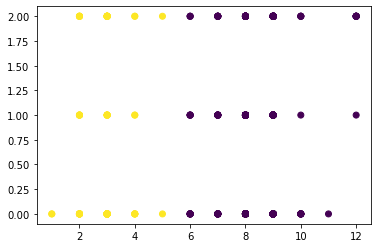

In [88]:
df_sel = df_temporal
clusters = best_temporal[0]
x_feat = 'month_n'
y_feat = 'fire_size'
iterations = 40

kmCluster = KMeans(n_clusters=clusters, n_init=iterations, init='random')
kmCluster.fit(df_sel)
plt.scatter(df_sel[x_feat], df_sel[y_feat], c=kmCluster.labels_)

Checking components for the FWI data set:

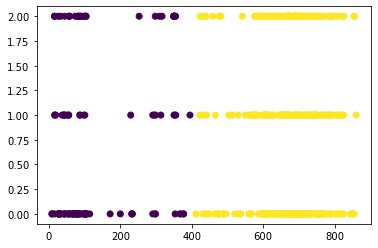

In [89]:
df_sel = df_fwi_components
clusters = best_fwi_components[0]
x_feat = 'DC'
y_feat = 'fire_size'
iterations = 50

kmCluster = KMeans(n_clusters=clusters, n_init=iterations, init='random')
kmCluster.fit(df_sel)
plt.scatter(df_sel[x_feat], df_sel[y_feat], c=kmCluster.labels_)

## *C.* Supervised Learning: Regression

We will now take a supervised learning approach, which means that we will be working now with labeled datasets (input and output), in order to attempt to make predictions. We will startoff with a simple regression model. 

The first step is to label our data as input data `X` and output data `y`. For a regression model, the output variable will be of numerical type, which in our case corresponds to the logarithmic transformed area, in contrast with a classification model, which requires a categorical feature. The input data will correspond to the rest of our features.

Additionally, data should be separated into train data and test data. 

Let us build a function that will do all of this for us each time we want to test a model. We will also add a scaling option in order to test it with some other models that require it.

In [201]:
def preprocForModel(task, scale=False, testPct=0.2, randState=20):
    # Split into input and output features (X and y)
    y = df['area_ln'] if task == 'regression' else df['fire_size'] if task == 'classification' else None
    X = df.drop(['area','area_ln','fire_size', 'month','day'], axis=1)
    
    # Split into train and test data sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, 
                                        test_size=testPct, random_state=randState)

    # Scale input features (X train and test)
    if scale:
        Scaler = StandardScaler()
        Scaler.fit(X)
        X_train = pd.DataFrame( Scaler.transform(X_train), columns=X_train.columns)
        X_test = pd.DataFrame( Scaler.transform(X_test), columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [202]:
X_train, X_test, y_train, y_test = preprocForModel('regression')

Now that we have our test and train data sets, it is time to train some models. First we will try a simple Linear Regression model.

### Linear Regression Model

In [203]:
 # Create it
LinReg = LinearRegression()

# Train it
LinReg.fit(X_train, y_train)

# Test it
print("Linear Regression Model Score: ", LinReg.score(X_test, y_test)) # But this is too low. should be about 0.02 ... ?

# Technologic

Linear Regression Model Score:  0.010726813919217038


### MLP Regressor

The MultiLayer Perceptron Regressor is a neural network model that allows us to model or buid a neural network that will attempt to learn from the data to be able to make predictions. We found a really good [visualziation tool](http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=5,2,2&seed=0.42098&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) that allowed us to understand how it works. By configuring the amount of hidden layers and "neurons", the model is then, hopefully, able to find patterns in the data that will help make a prediction. It can be used both as a Regressor and a Classifier, so let us take a look at how the regressor works.

In [204]:
MLPReg = MLPRegressor(hidden_layer_sizes=(16, 16))
MLPReg.fit(X_train, y_train)
print("MLP Regressor Model Score: ", MLPReg.score(X_test, y_test)) 

MLP Regressor Model Score:  -1.0102806261450357


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [205]:
# Now let's try with scalated data
X_train, X_test, y_train, y_test = preprocForModel('regression', scale=True)

MLPReg_scaled = MLPRegressor(hidden_layer_sizes=(16, 16))
MLPReg_scaled.fit(X_train, y_train)
print("MLP Regressor Model Score: ", MLPReg_scaled.score(X_test, y_test)) 

MLP Regressor Model Score:  -0.02095504855394359


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Finally we compare with the OLS model.

### Ordinary Least Squares Regression Model

In [206]:
#First, import some libraries. 
#We use statsmodels.api.OLS for the linear regression since it contains a much more detailed 
#report on the results of the fit than sklearn.linear_model.LinearRegression.
# visit for useful info about OLS : http://efavdb.com/interpret-linear-regression/
import statsmodels.formula.api as sm

Now we have to create dummy variables to represent day and month in our model

In [207]:
#this function should return a dataframe including the dummies for 'day' and 'month'
def answer_13():
    # write your code here:
    res= pd.get_dummies(df,columns=['day','month'])
    #result=res.ix[:, 'day_Fri':].astype('object')
    #result2=pd.concat([answer_13().ix[:,'total_bill':'tip_rate'],result],axis=1)
    return res
answer_13()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,1,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,0,1,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,1,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [208]:
res = answer_13()
res = res.drop(['day_n','month_n','fire_size'],axis=1)
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          517 non-null    int64  
 1   Y          517 non-null    int64  
 2   FFMC       517 non-null    float64
 3   DMC        517 non-null    float64
 4   DC         517 non-null    float64
 5   ISI        517 non-null    float64
 6   temp       517 non-null    float64
 7   RH         517 non-null    int64  
 8   wind       517 non-null    float64
 9   rain       517 non-null    float64
 10  area       517 non-null    float64
 11  area_ln    517 non-null    float64
 12  day_fri    517 non-null    uint8  
 13  day_mon    517 non-null    uint8  
 14  day_sat    517 non-null    uint8  
 15  day_sun    517 non-null    uint8  
 16  day_thu    517 non-null    uint8  
 17  day_tue    517 non-null    uint8  
 18  day_wed    517 non-null    uint8  
 19  month_apr  517 non-null    uint8  
 20  month_aug 

In [209]:
# answer13() provides a dataframe where the new columns are considered as float which is not true
#the following lines of codes will resolve the problem for you.
#from now use the dataframe 'data'.
res = res.loc[:, 'day_fri':].astype('object') ## i.e. consider as object, all variables from day_Fri till the end
data = pd.concat([answer_13().loc[:,'X':'area_ln'],res],axis=1)

Verify that new variables are considered as objects

In [210]:
data.dtypes

X              int64
Y              int64
FFMC         float64
DMC          float64
DC           float64
ISI          float64
temp         float64
RH             int64
wind         float64
rain         float64
area         float64
area_ln      float64
day_fri       object
day_mon       object
day_sat       object
day_sun       object
day_thu       object
day_tue       object
day_wed       object
month_apr     object
month_aug     object
month_dec     object
month_feb     object
month_jan     object
month_jul     object
month_jun     object
month_mar     object
month_may     object
month_nov     object
month_oct     object
month_sep     object
dtype: object

First we modify the function from the tutorial to take response and predictors as string.

In [211]:
# this function fits a general model respecting the requirements 
# and returns a summary about that model
# ( use :  your_model.summary())
# fit function  uses the model to create a best fit line, hence the linear regression
def linear_regression(response,predictors):
    # response as string
    # predictors as string: "predictor_1+predictor_2+...+predictor_n"
    model=sm.ols(formula=response+"~"+predictors,data=data).fit()
    return model.summary()

Now we fit a general linear model with area as a response variable against all other variables of interest.

In [212]:
linear_regression("data.area_ln","data.X+data.Y+data.FFMC+data.DMC+data.DC+data.ISI+data.temp+data.RH+data.wind+data.rain+data.day_fri+data.day_mon+data.day_sat+data.day_sun+data.day_thu+data.day_tue+data.day_wed+data.month_jan+data.month_feb+data.month_mar+data.month_apr+data.month_may+data.month_jun+data.month_jul+data.month_aug+data.month_sep+data.month_oct+data.month_nov+data.month_dec")

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           data.area_ln   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     1.453
Date:                Thu, 21 Apr 2022   Prob (F-statistic):             0.0676
Time:                        14:53:29   Log-Likelihood:                -886.52
No. Observations:                 517   AIC:                             1829.
Df Residuals:                     489   BIC:                             1948.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.0939      1.336     -0.070      0.944      -2.718       2.531
data.day_fri[T.1]      -0.1933      0.245     -0.790      0.430      -0.674       0.288
data.day_mon[T.1]      -0.0475      0.244     -0.195      0.846      -0.526       0.431
data.day_sat[T.1]       0.1166      0.237      0.492      0.623      -0.350       0.583
data.day_sun[T.1]       0.0177      0.236      0.075      0.940      -0.446       0.481
data.day_thu[T.1]      -0.1210      0.253     -0.478      0.633      -0.619       0.377
data.day_tue[T.1]       0.1290      0.244      0.530      0.597      -0.349       0.608
data.day_wed[T.1]       0.0046      0.264      0.017      0.986      -0.514       0.523
data.month_jan[T.1]    -0.5998      1.042     -0.576      0.565      -2.647       1.448
data.month_feb[T.1]    -0.0948      0.429     -0.221      0.825      -0.938       0.748
data.month_mar[T.1]    -0.6250      0.373     -1.674      0.095      -1.359       0.108
data.month_apr[T.1]    -0.2834      0.541     -0.524      0.601      -1.346       0.779
data.month_may[T.1]     0.4341      0.971      0.447      0.655      -1.473       2.342
data.month_jun[T.1]    -0.5696      0.414     -1.375      0.170      -1.383       0.244
data.month_jul[T.1]    -0.1842      0.420     -0.438      0.661      -1.010       0.642
data.month_aug[T.1]     0.0440      0.498      0.088      0.930      -0.934       1.022
data.month_sep[T.1]     0.7100      0.595      1.194      0.233      -0.459       1.879
data.month_oct[T.1]     0.5398      0.677      0.797      0.426      -0.790       1.870
data.month_nov[T.1]    -1.3866      1.316     -1.053      0.293      -3.973       1.200
data.month_dec[T.1]     1.9217      0.565      3.402      0.001       0.812       3.032
data.X                  0.0524      0.032      1.617      0.106      -0.011       0.116
data.Y                 -0.0185      0.061     -0.303      0.762      -0.138       0.101
data.FFMC               0.0075      0.017      0.448      0.655      -0.025       0.040
data.DMC                0.0042      0.002      2.225      0.027       0.000       0.008
data.DC                -0.0020      0.001     -1.578      0.115      -0.005       0.000
data.ISI               -0.0148      0.018     -0.823      0.411      -0.050       0.021
data.temp               0.0360      0.022      1.616      0.107      -0.008       0.080
data.RH                 0.0007      0.006      0.107      0.915      -0.012       0.013
data.wind               0.0603      0.038      1.567      0.118      -0.015       0.136
data.rain               0.0309      0.215      0.144      0.886      -0.391       0.453
==============================================================================
Omnibus:                       78.644   Durbin-Watson:                   0.964
Prob(Omnibus):       

We can try to predict another target variable with this model.

In [213]:
linear_regression("data.X","data.area_ln+data.Y+data.FFMC+data.DMC+data.DC+data.ISI+data.temp+data.RH+data.wind+data.rain+data.day_fri+data.day_mon+data.day_sat+data.day_sun+data.day_thu+data.day_tue+data.day_wed+data.month_jan+data.month_feb+data.month_mar+data.month_apr+data.month_may+data.month_jun+data.month_jul+data.month_aug+data.month_sep+data.month_oct+data.month_nov+data.month_dec")

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 data.X   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     9.548
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           1.19e-30
Time:                        14:53:29   Log-Likelihood:                -1057.3
No. Observations:                 517   AIC:                             2171.
Df Residuals:                     489   BIC:                             2290.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.6951      1.857     -0.913      0.362      -5.344       1.954
data.day_fri[T.1]      -0.2645      0.341     -0.777      0.438      -0.934       0.405
data.day_mon[T.1]      -0.0611      0.339     -0.180      0.857      -0.727       0.605
data.day_sat[T.1]      -0.0902      0.330     -0.273      0.785      -0.739       0.559
data.day_sun[T.1]      -0.4339      0.328     -1.324      0.186      -1.078       0.210
data.day_thu[T.1]      -0.2151      0.353     -0.610      0.542      -0.908       0.477
data.day_tue[T.1]      -0.2882      0.339     -0.851      0.395      -0.954       0.377
data.day_wed[T.1]      -0.3421      0.367     -0.932      0.352      -1.063       0.379
data.month_jan[T.1]    -1.4722      1.449     -1.016      0.310      -4.319       1.375
data.month_feb[T.1]     0.7462      0.596      1.252      0.211      -0.425       1.917
data.month_mar[T.1]     0.2316      0.521      0.445      0.657      -0.792       1.255
data.month_apr[T.1]     1.6304      0.749      2.176      0.030       0.158       3.103
data.month_may[T.1]     0.5965      1.351      0.442      0.659      -2.058       3.251
data.month_jun[T.1]     0.7344      0.576      1.274      0.203      -0.398       1.867
data.month_jul[T.1]    -0.6585      0.584     -1.127      0.260      -1.807       0.490
data.month_aug[T.1]    -1.7340      0.688     -2.520      0.012      -3.086      -0.382
data.month_sep[T.1]    -2.1536      0.823     -2.616      0.009      -3.771      -0.536
data.month_oct[T.1]    -0.9578      0.942     -1.017      0.310      -2.808       0.892
data.month_nov[T.1]     3.2458      1.828      1.776      0.076      -0.345       6.837
data.month_dec[T.1]    -1.9038      0.791     -2.408      0.016      -3.457      -0.350
data.area_ln            0.1015      0.063      1.617      0.106      -0.022       0.225
data.Y                  1.0194      0.071     14.302      0.000       0.879       1.159
data.FFMC               0.0096      0.023      0.414      0.679      -0.036       0.055
data.DMC               -0.0051      0.003     -1.966      0.050      -0.010   -3.46e-06
data.DC                 0.0043      0.002      2.458      0.014       0.001       0.008
data.ISI                0.0280      0.025      1.120      0.263      -0.021       0.077
data.temp              -0.0058      0.031     -0.188      0.851      -0.067       0.055
data.RH                 0.0099      0.009      1.140      0.255      -0.007       0.027
data.wind               0.0449      0.054      0.836      0.403      -0.061       0.150
data.rain               0.3111      0.299      1.042      0.298      -0.275       0.898
==============================================================================
Omnibus:                       12.879   Durbin-Watson:                   1.611
Prob(Omnibus):       

We try and find a good model by using a stepwise algorithm with the AIC statistic as a variable selection process and starting from the full model.

In [214]:
# this function is provided since there is no specific method for aicstatistic in python
# the source code was taken from : http://planspace.org/20150423-forward_selection_with_statsmodels/
import statsmodels.formula.api as smf

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} ".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} ".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [215]:
def answer_16():
    #data_new=data.iloc[:,2:12]
    data_new = data
    model = forward_selected(data_new, 'area_ln')
    return  model.model.formula ,model.rsquared_adj
answer_16()

('area_ln ~ area + month_dec + month_sep + DMC + month_feb + wind + temp + month_may + X ',
 0.29692691681290195)

The resulting model with the five most significant variables temp, day_sat, X, month_sep and wind is still not significant.

## *D.* Supervised Learning: Classification

First let us define a function which calculates precision, recall, accuracy and F1 measure.

In [267]:
# Takes confusion matrix and outputs true negative, false positive, false negative and true positive
# TN True negative
# FP False positive
# FN False negative
# TP True positive
def conf_to_values(conf):
    TN = conf[0][0]
    FP = conf[0][1]
    FN = conf[1][0]
    TP = conf[1][1]
    return TN, FP, FN, TP

In [284]:
# Takes true negative, false positive, false negative and true positive as tuple and
# returns precision, recall, accuracy and F1 measure.
def evaluation_measures(tuple):
    TN,FP,FN,TP = tuple
    precision = TP / float(TP + FP)
    recall = TP / float(TP + FN)
    accuracy = (TP + TN) / float(TP + TN + FP + FN)
    F1 = 2 * precision * recall / (precision + recall)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("Accuracy: ", accuracy)
    print("F1: ", F1)
    return precision, recall, accuracy, F1

### Logistic Regression Classifier

For a classification model we will first use a simple linear classification model, the Logistic Regression Classification model. From now on we will have to use our `fire_size` feature as dataset, which was a categorization of the burned area values.

The way this model works is by using regression. In Logistic Regression, the data follows the sigmoid function, in which the lower bound is 0 and the upper bound is 1. Therefore, the model computes if the probability of a feature is greater than a given threshold, then it belongs to some category.

In [90]:
X_train, X_test, y_train, y_test = preprocForModel('classification', scale=True)

LRClassifier = LogisticRegression()
LRClassifier.fit(X_train, y_train)
LRClassifier.score(X_test, y_test)

0.4519230769230769

We can see that the result is already much better than the regression models applied on the dataset. However, it is still not enough / close to 50%, which is basically a random guess.

### PCA

To improve our classification models we can first to a [Principal Components Analysis (PCA)](https://www.kaggle.com/code/shrutimechlearn/step-by-step-pca-with-iris-dataset/notebook) and then do a comparison of the model with and withoud PCA.

In [286]:
from sklearn.decomposition import PCA

# Convert dataframe to numpy array
df_array = df.to_numpy()

# Remove categorical features
df_array = np.delete(df_array, np.s_[2:4], axis=1) 

Next we select the number of components that will provide the most meaningful information and fit the data.

In [287]:
# COMP sets the number of components
COMP = 3
pca = PCA(n_components=COMP)
pca.fit(df_array)

PCA(n_components=3)

Here we can see the values of the eigenvectors of the 3 main principal components and

In [288]:
print(pca.components_)
print(pca.explained_variance_)

[[ 7.81887996e-04  4.75473754e-04 -7.39873596e-03 -1.79469505e-01
  -9.83526459e-01 -4.26931643e-03 -1.15750404e-02  2.27768039e-03
   1.43411630e-03 -4.47461971e-05 -1.38029927e-02 -3.83651118e-04
  -2.22740410e-04 -7.78758493e-03 -2.50154554e-05]
 [ 2.48850080e-03  1.08114878e-03  3.02529181e-03  7.44348592e-02
  -2.77250174e-02  5.28579258e-04  7.50451647e-03 -1.80795114e-02
   7.29345401e-04 -2.78620727e-05  9.96566807e-01  1.14329860e-02
   3.65302020e-03 -6.46227673e-05  8.93896810e-04]
 [ 5.69121000e-04  2.77162868e-03  2.37806904e-02  9.78592492e-01
  -1.77747486e-01  1.94461478e-02  1.84997847e-02  5.82074358e-02
   1.99377615e-03  4.54377326e-04 -7.72014805e-02 -8.80850474e-04
  -4.27583473e-04 -1.00327007e-02  3.83068661e-03]]
[63542.93123363  4054.95640423  2122.06304575]


We now apply the PCA transform on the data. We chose three components as they explain more than 98% of the variance ratio as seen in the following graphic.

In [289]:
df_pca = pca.transform(df_array)
print("original shape:   ", df_array.shape)
print("transformed shape:", df_pca.shape)

original shape:    (517, 15)
transformed shape: (517, 3)


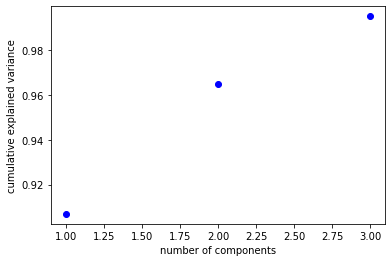

In [290]:
x = [x for x in range(1,COMP+1)]
plt.plot(x,np.cumsum(pca.explained_variance_ratio_),'bo')
#plt.axis([0, 4, 0.9, 1])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### KNN

In [291]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
scaler = MinMaxScaler()

X = df.drop(['fire_size','area','area_ln','month','day'],axis=1)
y = df.fire_size
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=20, stratify=y)

knn = KNeighborsClassifier(7)
knn.fit(X_train,y_train)
print("Train score before PCA",knn.score(X_train,y_train))
print("Test score before PCA",knn.score(X_test,y_test))

Train score before PCA 0.585956416464891
Test score before PCA 0.4519230769230769


In [292]:
# Confusion matrix
Result = knn.predict(X_test)
conf_matrix = confusion_matrix(y_test, Result)
print(conf)
#print(conf)
##On y-axis confusion matrix has the actual values, 
##and on the x-axis the values given by the predictor. 
##Therefore, the counts on the diagonal are the number of correct predictions. 
##And elements off the diagonal are incorrect predictions
## a/p  0   1   all
## 0   17   0   0
## 1    0  18   2
## all  0   0  13

(28, 14, 19, 5)


In [293]:
# Calculate evaulation measures
conf = conf_to_values(conf_matrix)
evaluation_measures(conf)

Precision:  0.46153846153846156
Recall:  0.24
Accuracy:  0.6285714285714286
F1:  0.3157894736842105


(0.46153846153846156, 0.24, 0.6285714285714286, 0.3157894736842105)

In [294]:
X_new = df_pca #pca.fit_transform(X)

In [295]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state=20, stratify=y)

knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA",knn_pca.score(X_train_new,y_train))
print("Test score after PCA",knn_pca.score(X_test_new,y_test))

Train score after PCA 0.7046004842615012
Test score after PCA 0.5288461538461539


In [296]:
# Confusion matrix
Result = knn_pca.predict(X_test_new)
conf_matrix = confusion_matrix(y_test, Result)
print(conf_matrix)

[[39 10  1]
 [19  6  2]
 [ 9  8 10]]


In [297]:
# Calculate evaulation measures
conf = conf_to_values(conf_matrix)
evaluation_measures(conf)

Precision:  0.375
Recall:  0.24
Accuracy:  0.6081081081081081
F1:  0.2926829268292683


(0.375, 0.24, 0.6081081081081081, 0.2926829268292683)

There is an improvement in train and test score when using PCA before KNN but the test score is so low that throwing a coin would provide a similar result which is not a satisfying firefighting strategy.

### Random forest

Let's do the same but this time we use [random forest as classification technique](https://www.kaggle.com/code/kishore1999/forest-fire-prediction-using-random-forest/notebook).

In [304]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [305]:
# Train Test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)

In [306]:
# Prediction
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
pred = rf.predict(X_test)
print("MAE:",mean_absolute_error(y_test,pred))
print("MSE:",mean_squared_error(y_test,pred))

MAE: 0.7248814102564102
MSE: 0.7443308381410255


In [307]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.2,random_state = 0)
rf.fit(X_train_new ,y_train)
pred = rf.predict(X_test_new)
print("MAE:",mean_absolute_error(y_test,pred))
print("MSE:",mean_squared_error(y_test,pred))

MAE: 0.16105769230769232
MSE: 0.09749134615384615


We observe that both KNN and Random Forest perform better after reducing the number of components. It is interesting to note that the techniques perform better with a different amount of principal components. While KNN seems to perform best with 3 components, Random Forest provides a better mean absolute error and mean squared error with 2 or 4 components

### MLP Classifier using FWI

We would like now to use the MLP Classifier model but only on the FWI data set. However, we think it will be interesting to generate the actual FWI data point from the components we already have. We can accomplish this taking as a reference a [FWI Calculator web app](https://fire.synopticlabs.org/cffdrs/main.js/cffwi-1.2.js), a [tool](https://fire.synopticlabs.org/tools/fwi/) by synoptic labs.

In [91]:
import math
def calc_bui(dmc, dc):
    # build up index
    bui = 0
    dmc = +dmc
    dc = +dc
    if (dmc <= 0.4 * dc):
        bui = 0.8 * dc * dmc / (dmc + 0.4 * dc)
    else:
        bui = dmc - (1. - 0.8 * dc / (dmc + 0.4 * dc)) * (0.92 + pow((0.0114 * dmc), 1.7))
    if (bui < 0):
        bui = 0.0
    if (dmc == 0 and dc == 0): 
        bui = 0
    return bui

def calc_fwi_index(bui, isi):
    if (bui>80):
        bb = 0.1 * isi * (1000.0 / (25.0 + 108.64 / math.exp(0.023*bui)))
    else:
        bb = 0.1 * isi * (0.626 * pow(bui, 0.809) + 2.0)
    
    if (bb <= 1):
        fwi = bb
    else:
        fwi = math.exp(2.72 * pow(0.434 * math.log(bb),0.647))
    return fwi

In [104]:
df_fwi_components['BUI'] = df_fwi_components.apply(lambda x: calc_bui(x.DMC, x.DC), axis=1)
df_fwi_components['FWI'] = df_fwi_components.apply(lambda x: calc_fwi_index(x.BUI, x.ISI), axis=1)

df_fwi_components.head()

/tmp/ipykernel_617/3768849812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fwi_components['BUI'] = df_fwi_components.apply(lambda x: calc_bui(x.DMC, x.DC), axis=1)
/tmp/ipykernel_617/3768849812.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fwi_components['FWI'] = df_fwi_components.apply(lambda x: calc_fwi_index(x.BUI, x.ISI), axis=1)


,FFMC,DMC,DC,ISI,fire_size,BUI,FWI
0,86.2,26.2,94.3,5.1,0,30.921902,10.293590
1,90.6,35.4,669.1,6.7,0,62.529409,18.709734
2,90.6,43.7,686.9,6.7,0,75.406720,20.671156
3,91.7,33.3,77.5,9.0,0,33.260199,16.736804
4,89.3,51.3,102.2,9.6,0,51.150592,21.854667


Now we can analyze the output `fire_size` against the calculated `FWI` index only. It will be interesting to run the MLP Classifier against this data.

In [134]:
# Preprocess

## Split into input and output features (X and y
X = df_fwi_components['FWI']
y = df_fwi_components['fire_size']

# Split into train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, 
                                    test_size=0.2, random_state=1)

X_train = pd.DataFrame(np.array(X_train).reshape(-1, 1))
X_test = pd.DataFrame(np.array(X_test).reshape(-1, 1))

In [135]:
NeuralNetworkClassifier = MLPClassifier(hidden_layer_sizes=(12,12))
NeuralNetworkClassifier.fit(X_train, y_train)

print("NN Classification Accuracy:", round(NeuralNetworkClassifier.score(X_test, y_test) * 100, 2), "%")

NN Classification Accuracy: 46.15 %


So in the end, it still around 50% chances that the model will predict correctly, not better than actually guessing the size of the fire. 

---